# 2. Pré-analyses et pre-processing

### Import des données

In [1]:
#pip install pyarrow
#pip install missingno
# Import de toutes les librairies nécessaires au projet
import pandas as pd
import numpy as np
import time
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
from pyarrow import csv

Certaines modifications ont été apportées au fichier Excel, comme certaines données qui n'ont pas été prises à tord et également pour certaines SCPI créé en 2018 et intéressantes à analyser, où des données ont été dupliquées de 2019 si elles restent du même ordre.

In [2]:
df = pd.read_excel('df_brut_modif.xlsx',index_col=0)
df.head(10)

,scpi_liste,type_SCPI,categorie,capital,creation,capitalisation,nb_associes,taux_occupation_financier,nb_immeubles,RAN,...,variation_prix_2018,variation_prix_2019,variation_prix_2020,variation_prix_2021,variation_prix_2022,pct_distrib_2018,pct_distrib_2019,pct_distrib_2020,pct_distrib_2021,pct_distrib_2022
0,allianz-home,SCPI de rendement,NaN,Variable,2021,39.91M€,867,100.00 %,1,0 %,...,NaN,NaN,NaN,0.00%,0.00%,NaN,NaN,NaN,0.00%,0.00%
1,corum-xl,SCPI de Rendement,Diversifiée,Variable,2016,322.96M€,40 109,99.52 %,70,NaN,...,0%,1%,0%,0%,0%,0%,6.26%,4.47%,5.84%,5.97%
2,remake-live,SCPI de rendement,Diversifiée,Variable,2022,237.59M€,408,100.00 %,18,0 %,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,novapierre-1,SCPI de rendement,Commerces,Variable,1999,237.59M€,2 428,86.9 %,136,"10,33 %",...,1.38%,0.93%,0.00%,0.00%,0.00%,3.95%,4.21%,3.70%,4.80%,4.51%
4,laffitte-pierre,SCPI de rendement,Bureaux,Variable,2000,886.7M€,21 179,90.06 %,74,"20,46 %",...,0.00%,0.98%,3.17%,0.45%,0%,3.85%,4.03%,3.49%,3.53%,4.00%
5,activimmo,SCPI de rendement,Activité / Logistique,Variable,2019,4161.5M€,16 377,98.30 %,114,"1,09 %",...,NaN,NaN,0.00%,0.00%,0.00%,NaN,NaN,6.05%,6.02%,5.50%
6,capiforce,SCPI de rendement,Commerce,Fixe,1982,42.3M€,3 346,94.98 %,95,"34,63 %",...,-4.82%,-13.1%,-6.96%,0.00%,-9.58%,5.17%,5.95%,5.50%,6.06%,8.93%
7,buroboutic,SCPI de rendement,Diversifiée,Variable,1986,75.3M€,6 927,90.21 %,176,"7,89 %",...,0.00%,0.00%,0.00%,0.00%,0.00%,4.34%,4.42%,4.27%,4.08%,4.31%
8,atream-hotels,SCPI de rendement,Tourisme et loisirs,Variable,2016,108.6M€,2988,100.00 %,20,"38,42 %",...,0.00%,0.00%,0.00%,0.00%,0.00%,4.60%,4.75%,2.37%,2.64%,5.05%
9,atout-pierre-diversification,SCPI de rendement,Bureaux,Variable,1987,281.5M€,26 824,86.40 %,82,"53,76 %",...,0.49%,2.36%,0.63%,0.00%,0.00%,4.12%,4.14%,4.11%,4.14%,4.07%


Voici quelques définitions pour rappel :
- Capital :
Une SCPI à capital variable permet d'acheter des parts dont le prix varie en fonction du marché immobilier, alors qu'une SCPI à capital fixe permet d'acheter des parts dont le prix varie en fonction de leurs attraits auprès des investisseurs.
- Taux d'occupation financier :
total des loyers et indemnités facturés divisés par le total des loyers qui seraient facturés si les locaux étaient intégralement loués.

- RAN : Report À Nouveau, c'est une réserve financière

En général, il y a des frais de souscription et des frais de gestion mais les pourcentages de distribution sont calculés par rapport au prix total, donc net de ces frais.

On va à présent avoir un 1er aperçu des variables et des valeurs manquantes que l'on peut trouver.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   scpi_liste                 108 non-null    object
 1   type_SCPI                  108 non-null    object
 2   categorie                  107 non-null    object
 3   capital                    108 non-null    object
 4   creation                   107 non-null    object
 5   capitalisation             108 non-null    object
 6   nb_associes                104 non-null    object
 7   taux_occupation_financier  100 non-null    object
 8   nb_immeubles               103 non-null    object
 9   RAN                        100 non-null    object
 10  pct_charge                 85 non-null     object
 11  variation_prix_2018        82 non-null     object
 12  variation_prix_2019        83 non-null     object
 13  variation_prix_2020        92 non-null     object
 14  variation_

<AxesSubplot:>

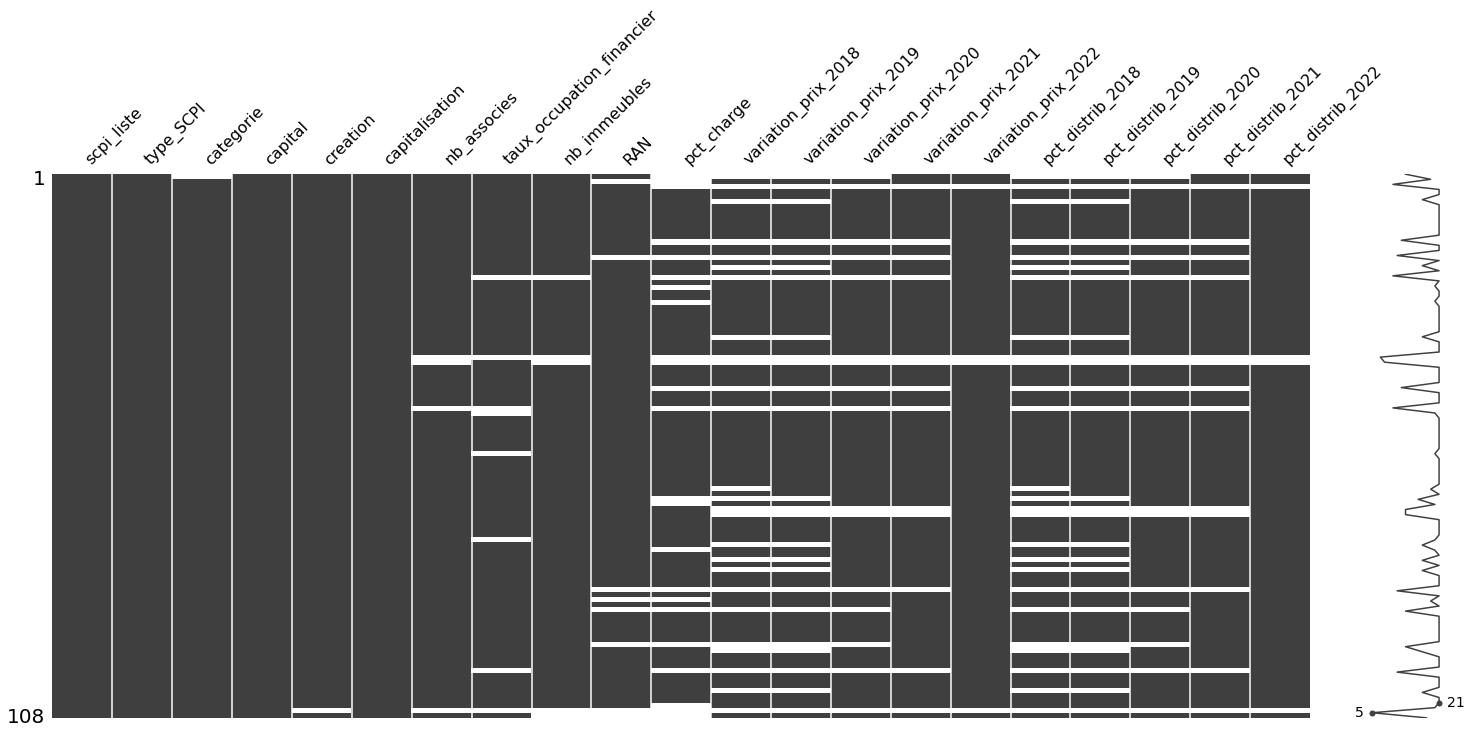

In [4]:
msno.matrix(df)

Remise en forme, suppression de lignes avec valeurs manquantes et redéfinition des types de variables :

In [5]:
df.creation=df.creation.apply(lambda x: x[-4:] if isinstance(x, str) else x)
df.iloc[:, 4:]=df.iloc[:, 4:].applymap(lambda x: x.replace('%','').replace(' ','').replace(',','.').replace('M€','') if isinstance(x, str) else x)

In [6]:
df.head(10)

,scpi_liste,type_SCPI,categorie,capital,creation,capitalisation,nb_associes,taux_occupation_financier,nb_immeubles,RAN,...,variation_prix_2018,variation_prix_2019,variation_prix_2020,variation_prix_2021,variation_prix_2022,pct_distrib_2018,pct_distrib_2019,pct_distrib_2020,pct_distrib_2021,pct_distrib_2022
0,allianz-home,SCPI de rendement,NaN,Variable,2021,39.91,867,100.00,1,0,...,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0.00,0.00
1,corum-xl,SCPI de Rendement,Diversifiée,Variable,2016,322.96,40109,99.52,70,NaN,...,0,1,0,0,0,0,6.26,4.47,5.84,5.97
2,remake-live,SCPI de rendement,Diversifiée,Variable,2022,237.59,408,100.00,18,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,novapierre-1,SCPI de rendement,Commerces,Variable,1999,237.59,2428,86.9,136,10.33,...,1.38,0.93,0.00,0.00,0.00,3.95,4.21,3.70,4.80,4.51
4,laffitte-pierre,SCPI de rendement,Bureaux,Variable,2000,886.7,21179,90.06,74,20.46,...,0.00,0.98,3.17,0.45,0,3.85,4.03,3.49,3.53,4.00
5,activimmo,SCPI de rendement,Activité / Logistique,Variable,2019,4161.5,16377,98.30,114,1.09,...,NaN,NaN,0.00,0.00,0.00,NaN,NaN,6.05,6.02,5.50
6,capiforce,SCPI de rendement,Commerce,Fixe,1982,42.3,3346,94.98,95,34.63,...,-4.82,-13.1,-6.96,0.00,-9.58,5.17,5.95,5.50,6.06,8.93
7,buroboutic,SCPI de rendement,Diversifiée,Variable,1986,75.3,6927,90.21,176,7.89,...,0.00,0.00,0.00,0.00,0.00,4.34,4.42,4.27,4.08,4.31
8,atream-hotels,SCPI de rendement,Tourisme et loisirs,Variable,2016,108.6,2988,100.00,20,38.42,...,0.00,0.00,0.00,0.00,0.00,4.60,4.75,2.37,2.64,5.05
9,atout-pierre-diversification,SCPI de rendement,Bureaux,Variable,1987,281.5,26824,86.40,82,53.76,...,0.49,2.36,0.63,0.00,0.00,4.12,4.14,4.11,4.14,4.07


In [7]:
#en attendant mieux, et on verra que ces variables ne sont pas très importantes pour la suite:
moyenne_str = str(df['taux_occupation_financier'].astype({'taux_occupation_financier':'float'}).dropna().mean())
df['taux_occupation_financier']=df['taux_occupation_financier'].fillna(moyenne_str)
moyenne2_str = str(df['RAN'].astype({'RAN':'float'}).dropna().mean())
df['RAN']=df['RAN'].fillna(moyenne2_str)

df['nb_associes']=df['nb_associes'].fillna("0.00")

df=df.dropna()


pd.set_option('display.max_rows', None)
df.head(120)

,scpi_liste,type_SCPI,categorie,capital,creation,capitalisation,nb_associes,taux_occupation_financier,nb_immeubles,RAN,...,variation_prix_2018,variation_prix_2019,variation_prix_2020,variation_prix_2021,variation_prix_2022,pct_distrib_2018,pct_distrib_2019,pct_distrib_2020,pct_distrib_2021,pct_distrib_2022
3,novapierre-1,SCPI de rendement,Commerces,Variable,1999,237.59,2428,86.9,136,10.33,...,1.38,0.93,0.00,0.00,0.00,3.95,4.21,3.70,4.80,4.51
4,laffitte-pierre,SCPI de rendement,Bureaux,Variable,2000,886.7,21179,90.06,74,20.46,...,0.00,0.98,3.17,0.45,0,3.85,4.03,3.49,3.53,4.00
6,capiforce,SCPI de rendement,Commerce,Fixe,1982,42.3,3346,94.98,95,34.63,...,-4.82,-13.1,-6.96,0.00,-9.58,5.17,5.95,5.50,6.06,8.93
7,buroboutic,SCPI de rendement,Diversifiée,Variable,1986,75.3,6927,90.21,176,7.89,...,0.00,0.00,0.00,0.00,0.00,4.34,4.42,4.27,4.08,4.31
8,atream-hotels,SCPI de rendement,Tourisme et loisirs,Variable,2016,108.6,2988,100.00,20,38.42,...,0.00,0.00,0.00,0.00,0.00,4.60,4.75,2.37,2.64,5.05
9,atout-pierre-diversification,SCPI de rendement,Bureaux,Variable,1987,281.5,26824,86.40,82,53.76,...,0.49,2.36,0.63,0.00,0.00,4.12,4.14,4.11,4.14,4.07
10,affinites-pierre,SCPI de rendement,Diversifiée,Fixe,2015,237.59,8432,98.20,31,0.09,...,1.30,1.72,0.62,0.00,0.00,5.15,5.24,4.32,4.14,4.90
11,allianz-pierre,SCPI de rendement,Bureaux,Variable,1984,28.53,24011,91.19,123,13.46,...,1.18,1.83,0.00,0.00,0.00,4.25,4.20,4.04,4.04,4.01
12,altixia-commerces,SCPI de rendement,Commerces,Variable,2018,886.7,669,94,15,32.66,...,0.00,0,0.00,0.00,1.50,4.71,4.71,5.03,5.21,5.26
14,epargne-pierre,SCPI de Rendement,Diversifiée,Variable,2013,41.5,38907,95.44,384,2.64,...,0,0,0,0,1.46,5.97,5.85,5.36,5.36,5.28


In [8]:
df=df.astype({
    'scpi_liste':'string',
    'type_SCPI':'string',
    'categorie':'string',
    'capital':'string',
    'creation':'int',
    'capitalisation':'float',
    'nb_associes':'int',
    'taux_occupation_financier':'float',
    'nb_immeubles':'int',
    'RAN':'float',
    'pct_charge':'float',    
    
    'pct_distrib_2018':'float',
    'pct_distrib_2019':'float',
    'pct_distrib_2020':'float',
    'pct_distrib_2021':'float',
    'pct_distrib_2022':'float',
    'variation_prix_2018':'float',
    'variation_prix_2019':'float',
    'variation_prix_2020':'float',
    'variation_prix_2021':'float',
    'variation_prix_2022':'float'

})

In [9]:
print(df.type_SCPI.unique())
print(df.categorie.unique())
print(df.capital.unique())

<StringArray>
[ 'SCPI de rendement',  'SCPI de Rendement', 'SCPI de plus-value',
 'SCPI de plus value']
Length: 4, dtype: string
<StringArray>
[             'Commerces',                'Bureaux',               'Commerce',
            'Diversifiée',    'Tourisme et loisirs',     'Santé et éducation',
          'Résidentielle',            'Résidentiel', 'Activités / Logistique']
Length: 9, dtype: string
<StringArray>
['Variable', 'Fixe']
Length: 2, dtype: string


In [10]:
df.type_SCPI = df.type_SCPI.apply(lambda x:x.replace('Rendement','rendement'))
df.categorie = df.categorie.apply(lambda x:x.replace('Résidentielle','Résidentiel'))
df.categorie = df.categorie.apply(lambda x:x.replace('Commerces','Commerce'))
df.type_SCPI = df.type_SCPI.apply(lambda x:x.replace('SCPI de plus-value','SCPI de plus value'))
print(df.type_SCPI.unique())
print(df.categorie.unique())
print(df.capital.unique())


['SCPI de rendement' 'SCPI de plus value']
['Commerce' 'Bureaux' 'Diversifiée' 'Tourisme et loisirs'
 'Santé et éducation' 'Résidentiel' 'Activités / Logistique']
<StringArray>
['Variable', 'Fixe']
Length: 2, dtype: string


# 3. Data analyse

### 1ères analyses et études des outliers

Voici une 1ère description statistique :

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
creation,74.0,1997.770270,15.644639,1966.0000,1986.0000,1995.500,2013.0000,2018.00
capitalisation,74.0,657.391622,940.928629,4.1300,63.9000,260.050,963.9500,5156.73
nb_associes,74.0,14412.013514,15883.693150,509.0000,2722.5000,8113.000,21134.2500,60574.00
taux_occupation_financier,74.0,93.025313,7.276534,39.2600,91.2325,93.875,96.3225,100.00
nb_immeubles,74.0,134.810811,144.735723,1.0000,45.7500,110.500,166.5000,1035.00
RAN,74.0,28.798243,41.636715,-134.3000,5.6375,15.175,38.8675,152.21
pct_charge,74.0,33.195214,23.702126,0.5758,21.9800,29.005,35.4000,164.18
variation_prix_2018,74.0,0.999054,2.923530,-4.8200,0.0000,0.000,1.3600,16.74
variation_prix_2019,74.0,1.194324,4.055105,-15.1000,0.0000,0.795,1.9050,23.04
variation_prix_2020,74.0,1.399324,3.764511,-11.3000,0.0000,0.470,1.4225,18.57


Ici, on va visualiser la proportion de SCPI par type ou par catégorie :

SCPI de rendement     72
SCPI de plus value     2
Name: type_SCPI, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

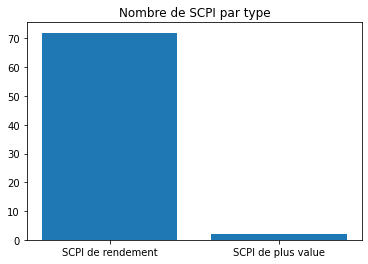

In [12]:
vc = df.type_SCPI.value_counts()
print(vc)
plt.bar(vc.index,vc.values)
plt.title("Nombre de SCPI par type")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

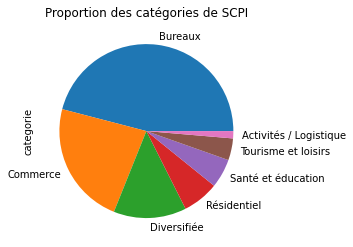

In [13]:
df.categorie.value_counts().plot(kind='pie',title='Proportion des catégories de SCPI')
plt.show

On va à présent calculer les différences des distributions entre chaque année et calculer la rentabilité comme étant la somme du pourcentage de distribution et de l'augmentation en capital (variation_prix). En revanche, il peut y avoir des frais au moment de la revente.

On calcule également la volatibilité pour voir si le pourcentage de distribution et la variation des prix ne varient pas excessivement d'une année sur l'autre, induisant un risque élevé.

In [14]:
df['pct_distrib_var_2018_2019']=df.apply(lambda x:x['pct_distrib_2019']-x['pct_distrib_2018'],axis=1)
df['pct_distrib_var_2019_2020']=df.apply(lambda x:x['pct_distrib_2020']-x['pct_distrib_2019'],axis=1)
df['pct_distrib_var_2020_2021']=df.apply(lambda x:x['pct_distrib_2021']-x['pct_distrib_2020'],axis=1)
df['pct_distrib_var_2021_2022']=df.apply(lambda x:x['pct_distrib_2022']-x['pct_distrib_2021'],axis=1)

df['rentabilite_totale_2018']=df.apply(lambda x:x['pct_distrib_2018']+x['variation_prix_2018'],axis=1)
df['rentabilite_totale_2019']=df.apply(lambda x:x['pct_distrib_2019']+x['variation_prix_2019'],axis=1)
df['rentabilite_totale_2020']=df.apply(lambda x:x['pct_distrib_2020']+x['variation_prix_2020'],axis=1)
df['rentabilite_totale_2021']=df.apply(lambda x:x['pct_distrib_2021']+x['variation_prix_2021'],axis=1)
df['rentabilite_totale_2022']=df.apply(lambda x:x['pct_distrib_2022']+x['variation_prix_2022'],axis=1)

df['volatibilite_pct_distrib']=df.apply(lambda x:((x['pct_distrib_var_2018_2019']**2+x['pct_distrib_var_2019_2020']**2+x['pct_distrib_var_2020_2021']**2+x['pct_distrib_var_2021_2022']**2)/4)**0.5,axis=1)
df['volatibilite_variation_prix']=df.apply(lambda x:((x['variation_prix_2019']**2+x['variation_prix_2020']**2+x['variation_prix_2021']**2+x['variation_prix_2022']**2)/4)**0.5,axis=1)
df['variation_prix_min']=df.apply(lambda x:min(x['variation_prix_2019'],x['variation_prix_2020'],x['variation_prix_2021'],x['variation_prix_2022']),axis=1)

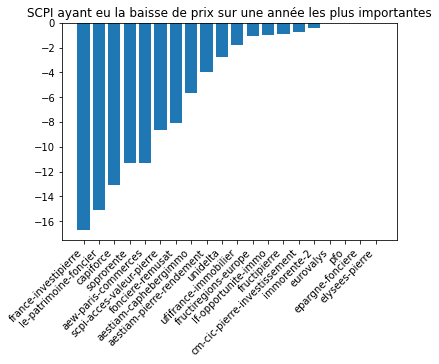

In [15]:
df_variation_prix_min = df.sort_values(by='variation_prix_min', ascending=True).head(20)
plt.bar(df_variation_prix_min['scpi_liste'],df_variation_prix_min['variation_prix_min'])
plt.xticks(rotation=45, ha='right')  # "ha" signifie "horizontal alignment"
plt.title('SCPI ayant eu la baisse de prix sur une année les plus importantes')
plt.show()

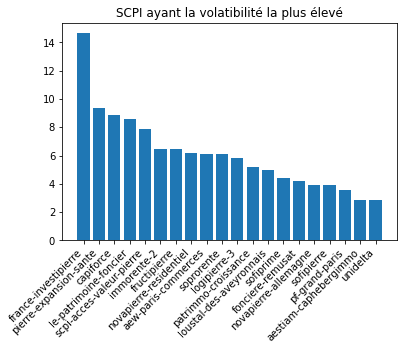

In [16]:
df_volatibilite_variation_prix = df.sort_values(by='volatibilite_variation_prix', ascending=False).head(20)
plt.bar(df_volatibilite_variation_prix['scpi_liste'],df_volatibilite_variation_prix['volatibilite_variation_prix'])
plt.xticks(rotation=45, ha='right')  # "ha" signifie "horizontal alignment"
plt.title('SCPI ayant la volatibilité la plus élevé')
plt.show()

In [17]:
df[['volatibilite_variation_prix','variation_prix_min']].describe()

,volatibilite_variation_prix,variation_prix_min
count,74.000000,74.000000
mean,2.273807,-1.283243
std,2.812262,3.744670
min,0.000000,-16.700000
25%,0.473750,0.000000
50%,1.106683,0.000000
75%,2.874495,0.000000
max,14.633158,2.260000


On va calculer la moyenne entre les années avant 2022 et les comparer par rapport à l'année 2022 ce qui nous permet déjà d'avoir une estimation de la rentabilité d'une SCPI.

In [18]:
df['moyenne_rentabilite_totale_2018_2021']=df.apply(lambda x:(x['rentabilite_totale_2018']+x['rentabilite_totale_2019']+x['rentabilite_totale_2020']+x['rentabilite_totale_2021'])/4,axis=1)
df['moyenne_pct_distrib_2018_2021']=df.apply(lambda x:(x['pct_distrib_2018']+x['pct_distrib_2019']+x['pct_distrib_2020']+x['pct_distrib_2021'])/4,axis=1)

from sklearn.metrics import mean_squared_error
print("mean_squared_error entre la rentabilité totale de 2022 et la moyenne des années précédentes :", mean_squared_error(df['moyenne_rentabilite_totale_2018_2021'],df['rentabilite_totale_2022']))
print("mean_squared_error entre la pct de distribution de 2022 et la moyenne des années précédentes :", mean_squared_error(df['moyenne_pct_distrib_2018_2021'],df['pct_distrib_2022']))


mean_squared_error entre la rentabilité totale de 2022 et la moyenne des années précédentes : 21.12706081081081
mean_squared_error entre la pct de distribution de 2022 et la moyenne des années précédentes : 0.741434206081081


In [19]:
df[['scpi_liste','moyenne_rentabilite_totale_2018_2021','rentabilite_totale_2022','moyenne_pct_distrib_2018_2021','pct_distrib_2022',]]

,scpi_liste,moyenne_rentabilite_totale_2018_2021,rentabilite_totale_2022,moyenne_pct_distrib_2018_2021,pct_distrib_2022
3,novapierre-1,4.7425,4.51,4.1650,4.51
4,laffitte-pierre,4.8750,4.00,3.7250,4.00
6,capiforce,-0.5500,-0.65,5.6700,8.93
7,buroboutic,4.2775,4.31,4.2775,4.31
8,atream-hotels,3.5900,5.05,3.5900,5.05
9,atout-pierre-diversification,4.9975,4.07,4.1275,4.07
10,affinites-pierre,5.6225,4.90,4.7125,4.90
11,allianz-pierre,4.8850,4.01,4.1325,4.01
12,altixia-commerces,4.9150,6.76,4.9150,5.26
14,epargne-pierre,5.6350,6.74,5.6350,5.28


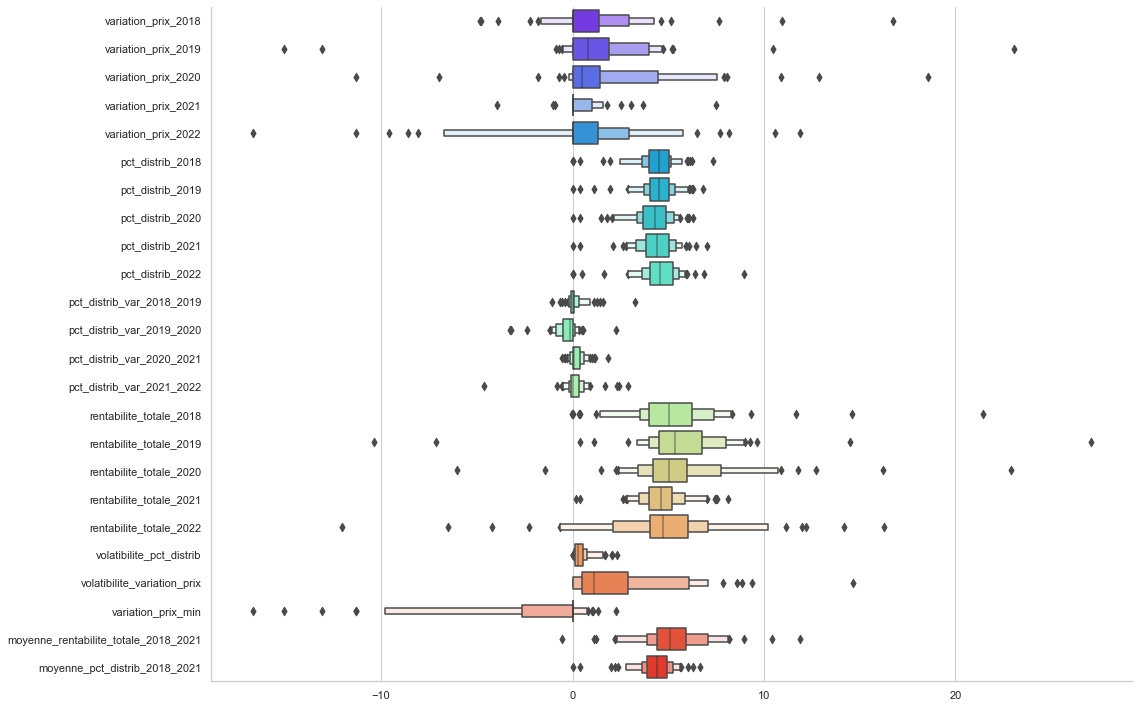

In [20]:
#sns.boxplot(df[['pct_distrib_2022','pct_distrib_2021']])
sns.set_theme()
sns.set_style('whitegrid')
sns.catplot(data=df.drop(['capitalisation','nb_associes','creation','nb_immeubles','RAN','pct_charge','taux_occupation_financier'],axis=1), kind='boxen', orient='h', color=df.index, palette='rainbow', height=10, aspect=1.6);

On constate que les variation du prix d'acquisition sont plus hétérogènes que les pourcentages de distribution.

### Graphiques concernant le taux de distribution (en %)

On va alors calculer la moyenne des pourcentages de distribution en fonction de chaque année et par catégorie :

In [21]:
df_moyennes = df[['categorie','pct_distrib_2018']].dropna().groupby(['categorie']).mean()

df_moyennes['pct_distrib_2019'] = df[['categorie','pct_distrib_2019']].dropna().groupby(['categorie']).mean()
df_moyennes['pct_distrib_2020'] = df[['categorie','pct_distrib_2020']].dropna().groupby(['categorie']).mean()
df_moyennes['pct_distrib_2021'] = df[['categorie','pct_distrib_2021']].dropna().groupby(['categorie']).mean()
df_moyennes['pct_distrib_2022'] = df[['categorie','pct_distrib_2022']].dropna().groupby(['categorie']).mean()
df_moyennes.head(10)

,pct_distrib_2018,pct_distrib_2019,pct_distrib_2020,pct_distrib_2021,pct_distrib_2022
categorie,,,,,
Activités / Logistique,4.650000,5.040000,4.520000,5.210000,5.410000
Bureaux,4.349412,4.402941,4.294706,4.388824,4.275882
Commerce,4.285294,4.392941,4.188235,4.575294,4.948824
Diversifiée,5.335000,5.243000,4.865000,5.010000,5.239000
Résidentiel,1.984000,2.638000,2.410000,2.292000,2.090000
Santé et éducation,4.522500,4.915000,4.715000,4.762500,4.842500
Tourisme et loisirs,4.676667,4.830000,1.880000,2.983333,5.120000


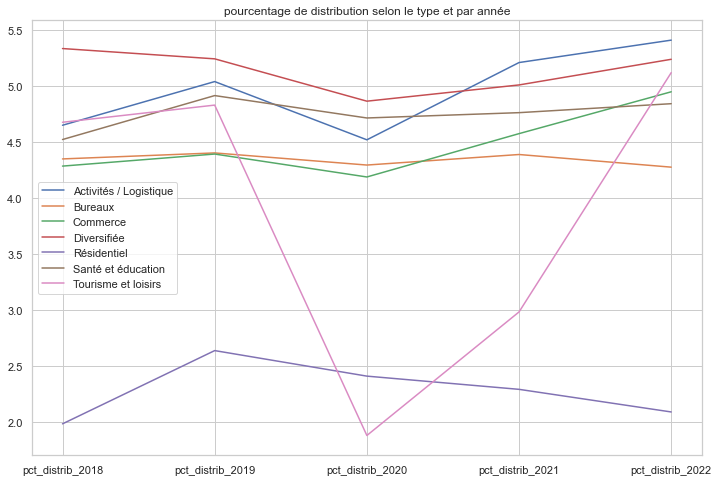

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(df_moyennes.T)
plt.legend(labels=df_moyennes.index)
plt.title("pourcentage de distribution selon le type et par année")
plt.show()

In [23]:
df_moyennes.mean()
df_moyennes.T.mean().sort_values(ascending=False)

categorie
Diversifiée               5.138400
Activités / Logistique    4.966000
Santé et éducation        4.751500
Commerce                  4.478118
Bureaux                   4.342353
Tourisme et loisirs       3.898000
Résidentiel               2.282800
dtype: float64

On peut également le comparer par rapport la moyenne par année :

In [24]:
print("rendement moyen 2018",df[['pct_distrib_2018']].mean())
print("rendement moyen 2019",df[['pct_distrib_2019']].mean())
print("rendement moyen 2020",df[['pct_distrib_2020']].mean())
print("rendement moyen 2021",df[['pct_distrib_2021']].mean())
print("rendement moyen 2022",df[['pct_distrib_2022']].mean())


rendement moyen 2018 pct_distrib_2018    4.33473
dtype: float64
rendement moyen 2019 pct_distrib_2019    4.448514
dtype: float64
rendement moyen 2020 pct_distrib_2020    4.147838
dtype: float64
rendement moyen 2021 pct_distrib_2021    4.348243
dtype: float64
rendement moyen 2022 pct_distrib_2022    4.493108
dtype: float64


On peut voir que le taux de distribution des SCPI résidentielles est basse mais on verra par la suite que celui-ci est rattrapé par une variation du prix d'aquisition plus élevé.

Essayons de voir ce qu'il en ait pour toute les SCPI par catégorie :

In [25]:
def afficher_pct_distrib_categorie(categorie):

    plt.figure(figsize=(12, 8))
    plt.plot(df[['pct_distrib_2018','pct_distrib_2019','pct_distrib_2020','pct_distrib_2021','pct_distrib_2022']][(df['categorie']==categorie)].T)# & (df['pct_distrib_2018']!=0.0)
    plt.legend(labels=df['scpi_liste'][df['categorie']==categorie])
    plt.title("Pourcentage de distribution SCPI de catégorie "+str(categorie))
    plt.show()



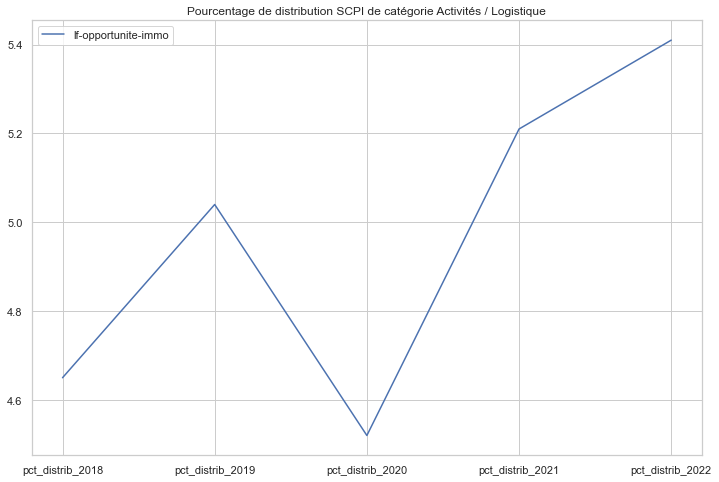

In [26]:
afficher_pct_distrib_categorie('Activités / Logistique')

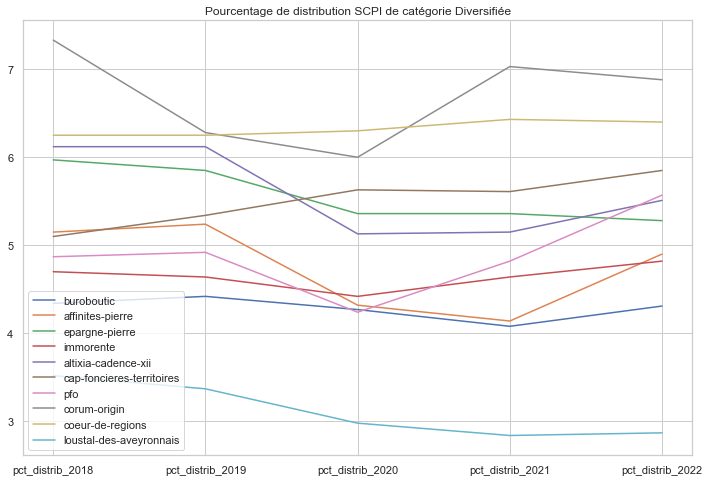

In [27]:
afficher_pct_distrib_categorie('Diversifiée')

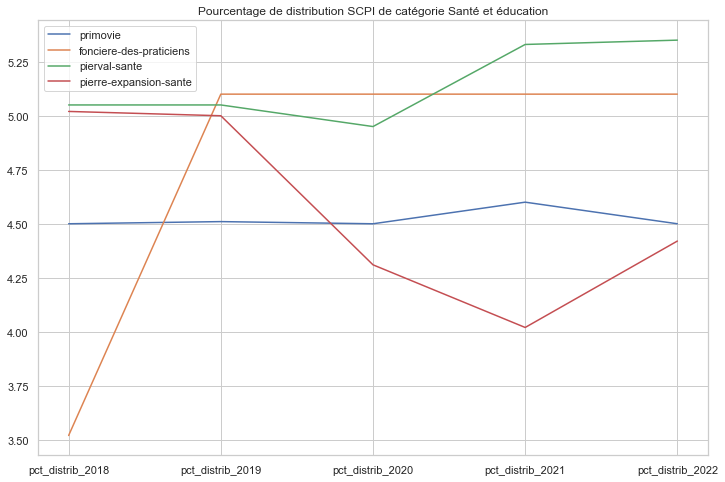

In [28]:
afficher_pct_distrib_categorie('Santé et éducation')

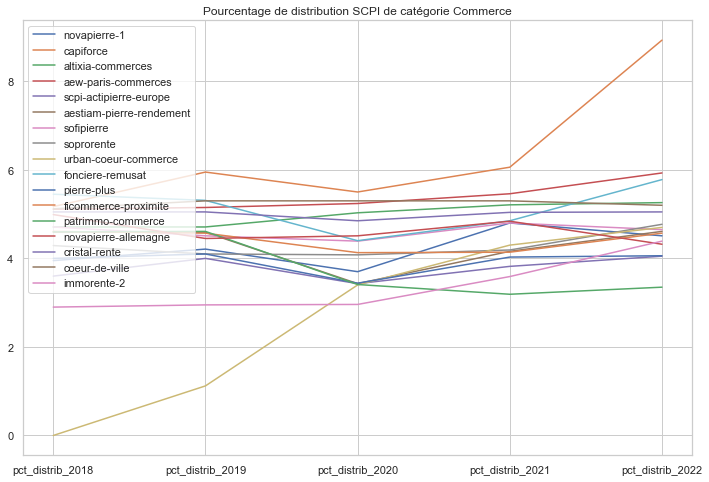

In [29]:
afficher_pct_distrib_categorie('Commerce')

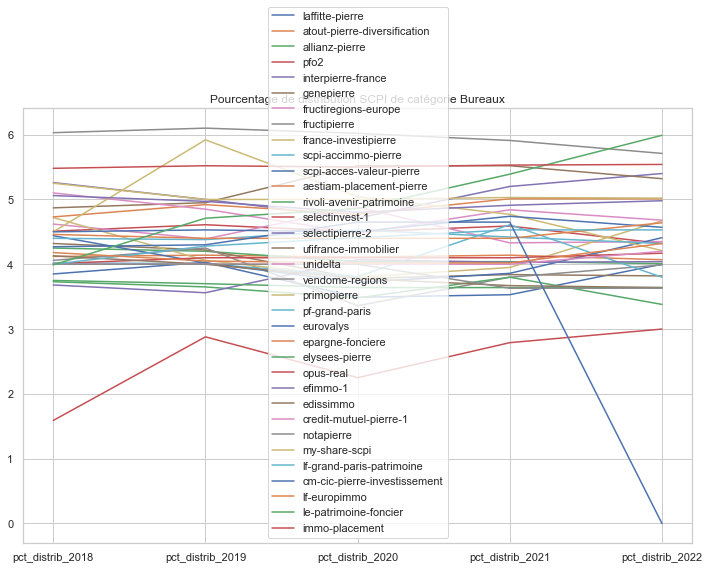

In [30]:
afficher_pct_distrib_categorie('Bureaux')

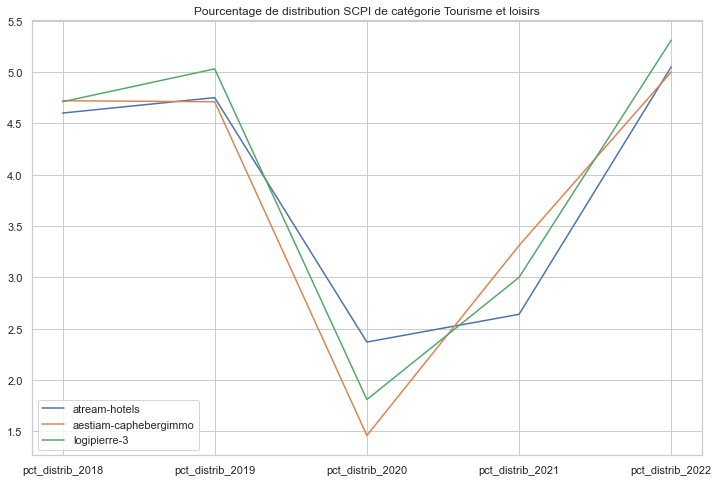

In [31]:
afficher_pct_distrib_categorie('Tourisme et loisirs')

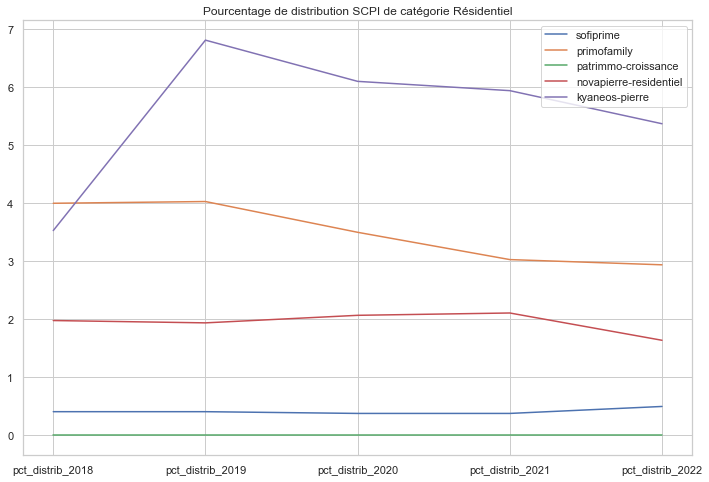

In [32]:
afficher_pct_distrib_categorie('Résidentiel')

### Graphiques concernant la variation des prix d'acquisition d'une année sur l'autre (en %)

On va alors calculer la moyenne des variation des prix en fonction de chaque année et par catégorie :

In [33]:
df_moyennes2 = df[['categorie','variation_prix_2018']].dropna().groupby(['categorie']).mean()

df_moyennes2['variation_prix_2019'] = df[['categorie','variation_prix_2019']].dropna().groupby(['categorie']).mean()
df_moyennes2['variation_prix_2020'] = df[['categorie','variation_prix_2020']].dropna().groupby(['categorie']).mean()
df_moyennes2['variation_prix_2021'] = df[['categorie','variation_prix_2021']].dropna().groupby(['categorie']).mean()
df_moyennes2['variation_prix_2022'] = df[['categorie','variation_prix_2022']].dropna().groupby(['categorie']).mean()
df_moyennes2.head(10)

,variation_prix_2018,variation_prix_2019,variation_prix_2020,variation_prix_2021,variation_prix_2022
categorie,,,,,
Activités / Logistique,0.000000,0.000000,0.000000,0.000000,-1.000000
Bureaux,0.928529,1.440588,1.652647,0.097353,-0.106471
Commerce,0.264706,0.601765,-0.945294,-0.048235,-0.242941
Diversifiée,0.632000,1.007000,1.307000,0.291000,0.916000
Résidentiel,1.586000,2.334000,4.180000,2.254000,4.234000
Santé et éducation,0.567500,1.142500,4.642500,0.000000,0.575000
Tourisme et loisirs,7.113333,0.953333,3.630000,1.233333,-1.886667


In [34]:
df_moyennes2.mean()
df_moyennes2.T.mean().sort_values(ascending=False)

categorie
Résidentiel               2.917600
Tourisme et loisirs       2.208667
Santé et éducation        1.385500
Diversifiée               0.830600
Bureaux                   0.802529
Commerce                 -0.074000
Activités / Logistique   -0.200000
dtype: float64

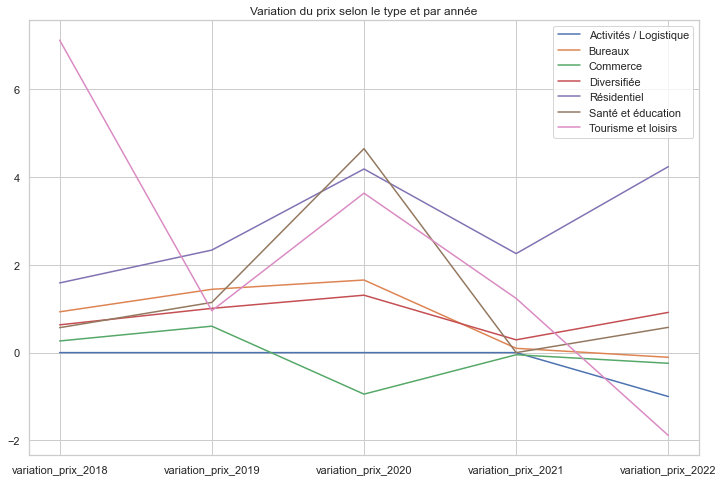

In [35]:
plt.figure(figsize=(12, 8))
plt.plot(df_moyennes2.T)
plt.legend(labels=df_moyennes2.index)
plt.title("Variation du prix selon le type et par année")
plt.show()

Essayons de voir ce qu'il en ait pour toute les SCPI par catégorie :

In [36]:
def afficher_variation_prix_categorie(categorie):

    plt.figure(figsize=(12, 8))
    plt.plot(df[['variation_prix_2018','variation_prix_2019','variation_prix_2020','variation_prix_2021','variation_prix_2022']][(df['categorie']==categorie)].T)# & (df['pct_distrib_2018']!=0.0)
    plt.legend(labels=df['scpi_liste'][df['categorie']==categorie])
    plt.title("Variation des prix des SCPI de catégorie "+str(categorie))


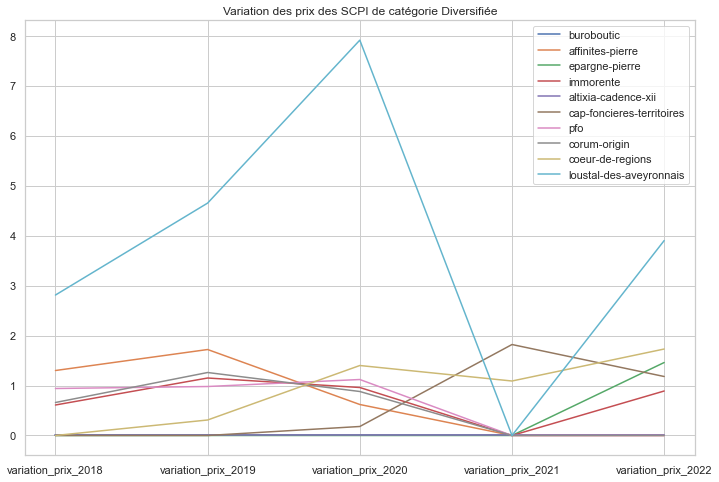

In [37]:
afficher_variation_prix_categorie('Diversifiée')

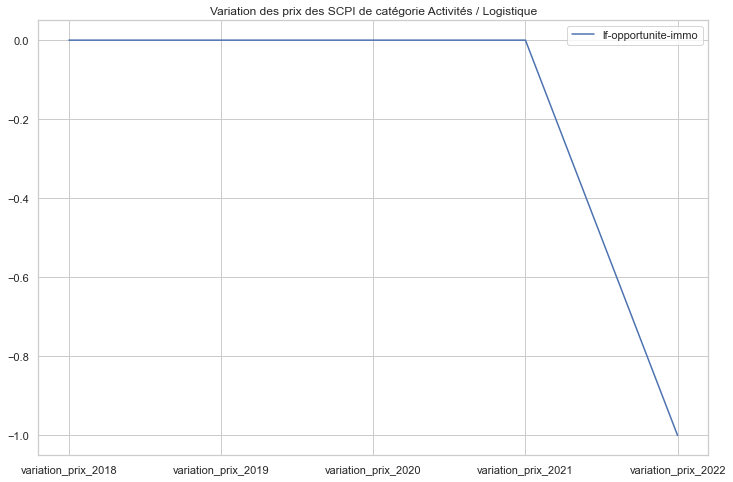

In [38]:
afficher_variation_prix_categorie('Activités / Logistique')

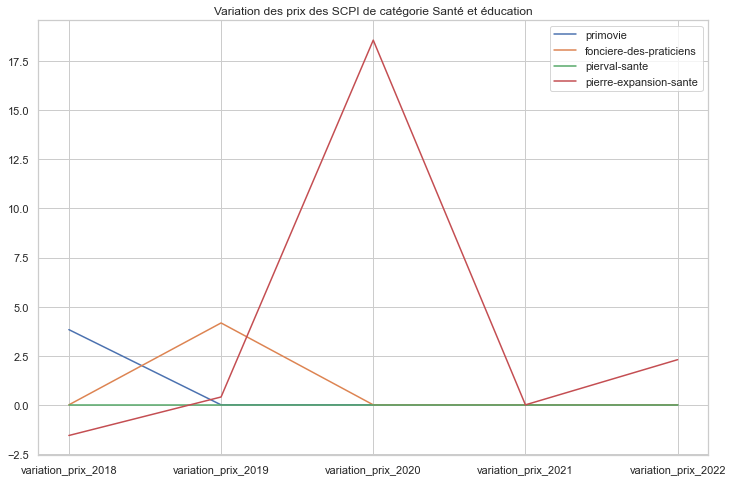

In [39]:
afficher_variation_prix_categorie('Santé et éducation')

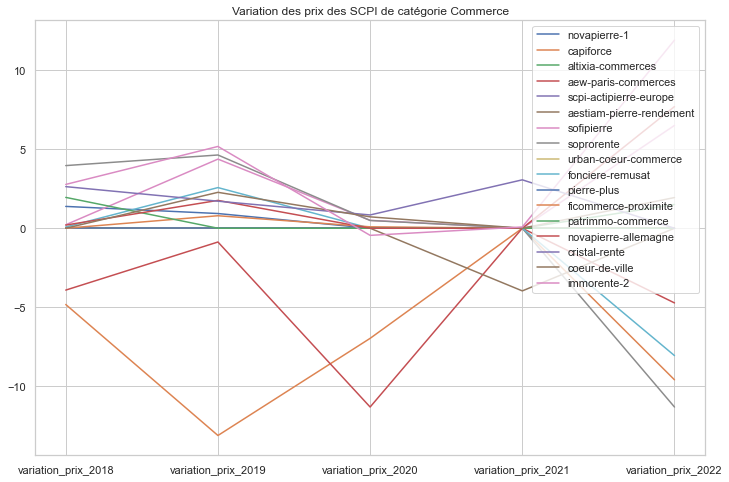

In [40]:
afficher_variation_prix_categorie('Commerce')

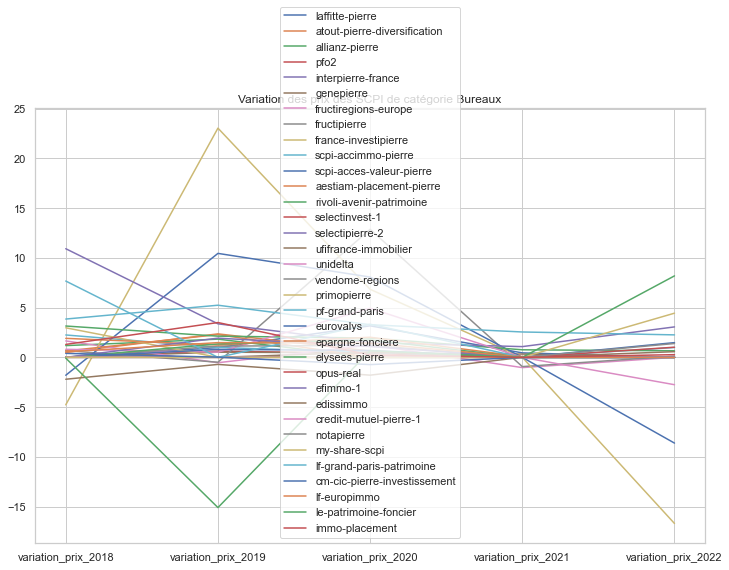

In [41]:
afficher_variation_prix_categorie('Bureaux')

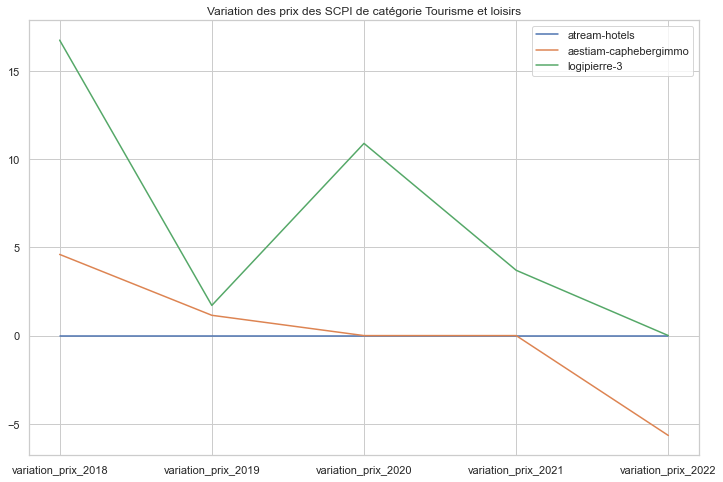

In [42]:
afficher_variation_prix_categorie('Tourisme et loisirs')

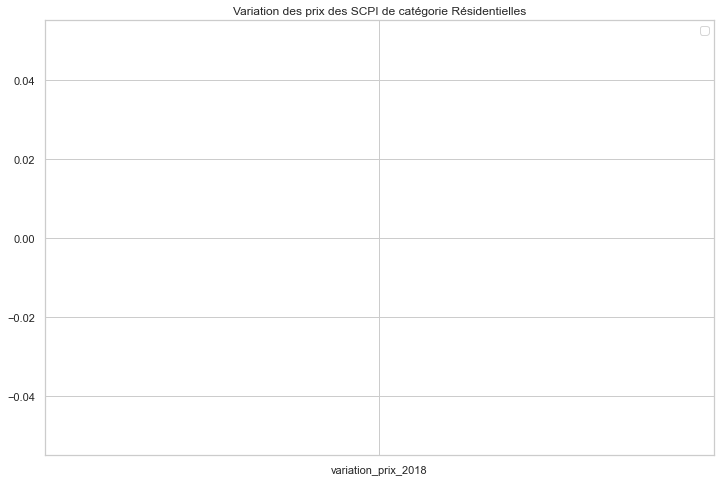

In [43]:
afficher_variation_prix_categorie('Résidentielles')

### Graphiques concernant la rentabilité totale (en %)

In [44]:
df_moyennes3 = df[['categorie','rentabilite_totale_2018']].dropna().groupby(['categorie']).mean()

df_moyennes3['rentabilite_totale_2019'] = df[['categorie','rentabilite_totale_2019']].dropna().groupby(['categorie']).mean()
df_moyennes3['rentabilite_totale_2020'] = df[['categorie','rentabilite_totale_2020']].dropna().groupby(['categorie']).mean()
df_moyennes3['rentabilite_totale_2021'] = df[['categorie','rentabilite_totale_2021']].dropna().groupby(['categorie']).mean()
df_moyennes3['rentabilite_totale_2022'] = df[['categorie','rentabilite_totale_2022']].dropna().groupby(['categorie']).mean()
df_moyennes3.head(10)

,rentabilite_totale_2018,rentabilite_totale_2019,rentabilite_totale_2020,rentabilite_totale_2021,rentabilite_totale_2022
categorie,,,,,
Activités / Logistique,4.650000,5.040000,4.520000,5.210000,4.410000
Bureaux,5.277941,5.843529,5.947353,4.486176,4.169412
Commerce,4.550000,4.994706,3.242941,4.527059,4.705882
Diversifiée,5.967000,6.250000,6.172000,5.301000,6.155000
Résidentiel,3.570000,4.972000,6.590000,4.546000,6.324000
Santé et éducation,5.090000,6.057500,9.357500,4.762500,5.417500
Tourisme et loisirs,11.790000,5.783333,5.510000,4.216667,3.233333


In [45]:
df_moyennes3.mean()
df_moyennes3.T.mean().sort_values(ascending=False)

categorie
Santé et éducation        6.137000
Tourisme et loisirs       6.106667
Diversifiée               5.969000
Résidentiel               5.200400
Bureaux                   5.144882
Activités / Logistique    4.766000
Commerce                  4.404118
dtype: float64

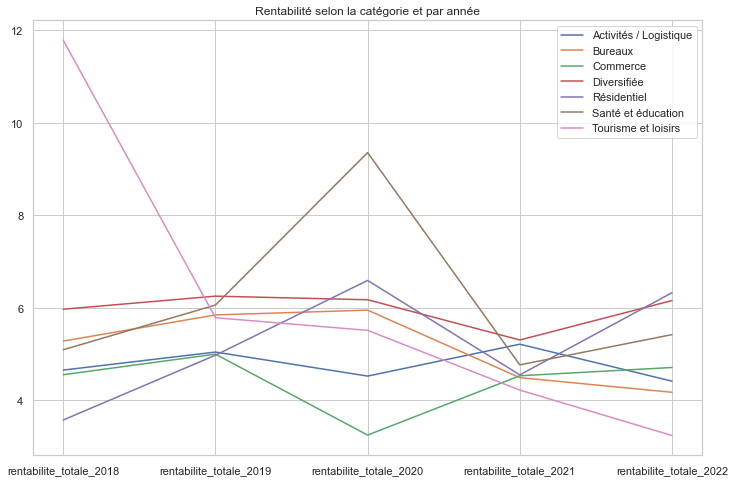

In [46]:
plt.figure(figsize=(12, 8))
plt.plot(df_moyennes3.T)
plt.legend(labels=df_moyennes3.index)
plt.title("Rentabilité selon la catégorie et par année")
plt.show()

In [47]:
df_moyennes4 = df[['type_SCPI','rentabilite_totale_2018']].dropna().groupby(['type_SCPI']).mean()

df_moyennes4['rentabilite_totale_2019'] = df[['type_SCPI','rentabilite_totale_2019']].dropna().groupby(['type_SCPI']).mean()
df_moyennes4['rentabilite_totale_2020'] = df[['type_SCPI','rentabilite_totale_2020']].dropna().groupby(['type_SCPI']).mean()
df_moyennes4['rentabilite_totale_2021'] = df[['type_SCPI','rentabilite_totale_2021']].dropna().groupby(['type_SCPI']).mean()
df_moyennes4['rentabilite_totale_2022'] = df[['type_SCPI','rentabilite_totale_2022']].dropna().groupby(['type_SCPI']).mean()
df_moyennes4.head(10)

,rentabilite_totale_2018,rentabilite_totale_2019,rentabilite_totale_2020,rentabilite_totale_2021,rentabilite_totale_2022
type_SCPI,,,,,
SCPI de plus value,2.775000,2.560000,6.495000,3.935000,2.830000
SCPI de rendement,5.404861,5.728472,5.520833,4.642639,4.792361


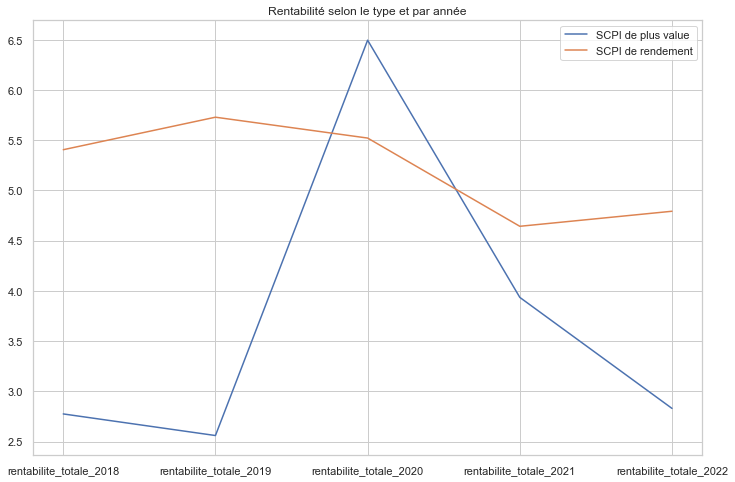

In [48]:
plt.figure(figsize=(12, 8))
plt.plot(df_moyennes4.T)
plt.legend(labels=df_moyennes4.index)
plt.title("Rentabilité selon le type et par année")
plt.show()

In [49]:
df_moyennes5 = df[['capital','rentabilite_totale_2018']].dropna().groupby(['capital']).mean()

df_moyennes5['rentabilite_totale_2019'] = df[['capital','rentabilite_totale_2019']].dropna().groupby(['capital']).mean()
df_moyennes5['rentabilite_totale_2020'] = df[['capital','rentabilite_totale_2020']].dropna().groupby(['capital']).mean()
df_moyennes5['rentabilite_totale_2021'] = df[['capital','rentabilite_totale_2021']].dropna().groupby(['capital']).mean()
df_moyennes5['rentabilite_totale_2022'] = df[['capital','rentabilite_totale_2022']].dropna().groupby(['capital']).mean()
df_moyennes5.head(10)

,rentabilite_totale_2018,rentabilite_totale_2019,rentabilite_totale_2020,rentabilite_totale_2021,rentabilite_totale_2022
capital,,,,,
Fixe,4.188000,5.378000,5.505333,4.289333,3.017333
Variable,5.625085,5.710169,5.557797,4.708475,5.177119


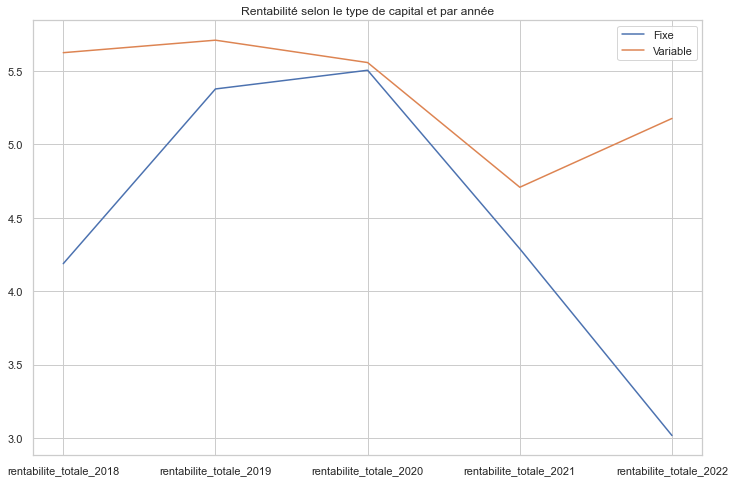

In [50]:
plt.figure(figsize=(12, 8))
plt.plot(df_moyennes5.T)
plt.legend(labels=df_moyennes5.index)
plt.title("Rentabilité selon le type de capital et par année")
plt.show()

Représention de la volatibilité (moyenne quadratique des variations de rendement), ici qui met en lumière les variations de rendement excessives :

In [51]:
df[['volatibilite_pct_distrib','categorie']].dropna().groupby(['categorie']).mean().sort_values(by='volatibilite_pct_distrib',ascending=True)



,volatibilite_pct_distrib
categorie,
Bureaux,0.325512
Diversifiée,0.359299
Santé et éducation,0.370557
Résidentiel,0.473710
Activités / Logistique,0.484407
Commerce,0.523240
Tourisme et loisirs,1.942504


In [52]:
df[['volatibilite_variation_prix','categorie']].dropna().groupby(['categorie']).mean().sort_values(by='volatibilite_variation_prix',ascending=True)

,volatibilite_variation_prix
categorie,
Activités / Logistique,0.500000
Diversifiée,1.134991
Bureaux,2.054739
Commerce,2.740575
Santé et éducation,2.860771
Tourisme et loisirs,2.900578
Résidentiel,3.963217


In [53]:
df[['volatibilite_pct_distrib','capital']].dropna().groupby(['capital']).mean().sort_values(by='volatibilite_pct_distrib',ascending=True)

,volatibilite_pct_distrib
capital,
Variable,0.423633
Fixe,0.581588


In [54]:
df[['volatibilite_variation_prix','capital']].dropna().groupby(['capital']).mean().sort_values(by='volatibilite_variation_prix',ascending=True)

,volatibilite_variation_prix
capital,
Variable,1.533607
Fixe,5.185258


Voici les observations que l'on peut en tirer :

Les SPCI de santé et d'éducation, de tourisme/loisir et diversifiés sont les plus rentables. En revanche, les rendements sont très volatils pour le type "tourisme et de loisir" alors celles diversifiées restent sures car varient moins dans le temps.

On voit clairement l'effet du covid en 2020 qui a enfoncé le rendement des SCPI de commerce et augmenté le rendement des SCPI de santé et d'éducation.

L'écart type est très grand concernant les variations de prix et dépendent fortement de la conjoncture qui va être moins favorable en 2023. On va alors par la suite plutot chercher à prédire le pourcentage de distribution.

Les SCPI à rendement sont meilleures que celles à plus-value.

### Dummies, corrélation entre variables et sélection avant machine learning

In [55]:
df.to_excel('df_sans_dummies.xlsx')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['capital'] = le.fit_transform(df['capital'])
df['type_SCPI'] = le.fit_transform(df['type_SCPI']) #####################

df=pd.get_dummies(df)



In [56]:
df.columns

Index(['scpi_liste', 'type_SCPI', 'capital', 'creation', 'capitalisation',
       'nb_associes', 'taux_occupation_financier', 'nb_immeubles', 'RAN',
       'pct_charge', 'variation_prix_2018', 'variation_prix_2019',
       'variation_prix_2020', 'variation_prix_2021', 'variation_prix_2022',
       'pct_distrib_2018', 'pct_distrib_2019', 'pct_distrib_2020',
       'pct_distrib_2021', 'pct_distrib_2022', 'pct_distrib_var_2018_2019',
       'pct_distrib_var_2019_2020', 'pct_distrib_var_2020_2021',
       'pct_distrib_var_2021_2022', 'rentabilite_totale_2018',
       'rentabilite_totale_2019', 'rentabilite_totale_2020',
       'rentabilite_totale_2021', 'rentabilite_totale_2022',
       'volatibilite_pct_distrib', 'volatibilite_variation_prix',
       'variation_prix_min', 'moyenne_rentabilite_totale_2018_2021',
       'moyenne_pct_distrib_2018_2021', 'categorie_Activités / Logistique',
       'categorie_Bureaux', 'categorie_Commerce', 'categorie_Diversifiée',
       'categorie_Résidentiel

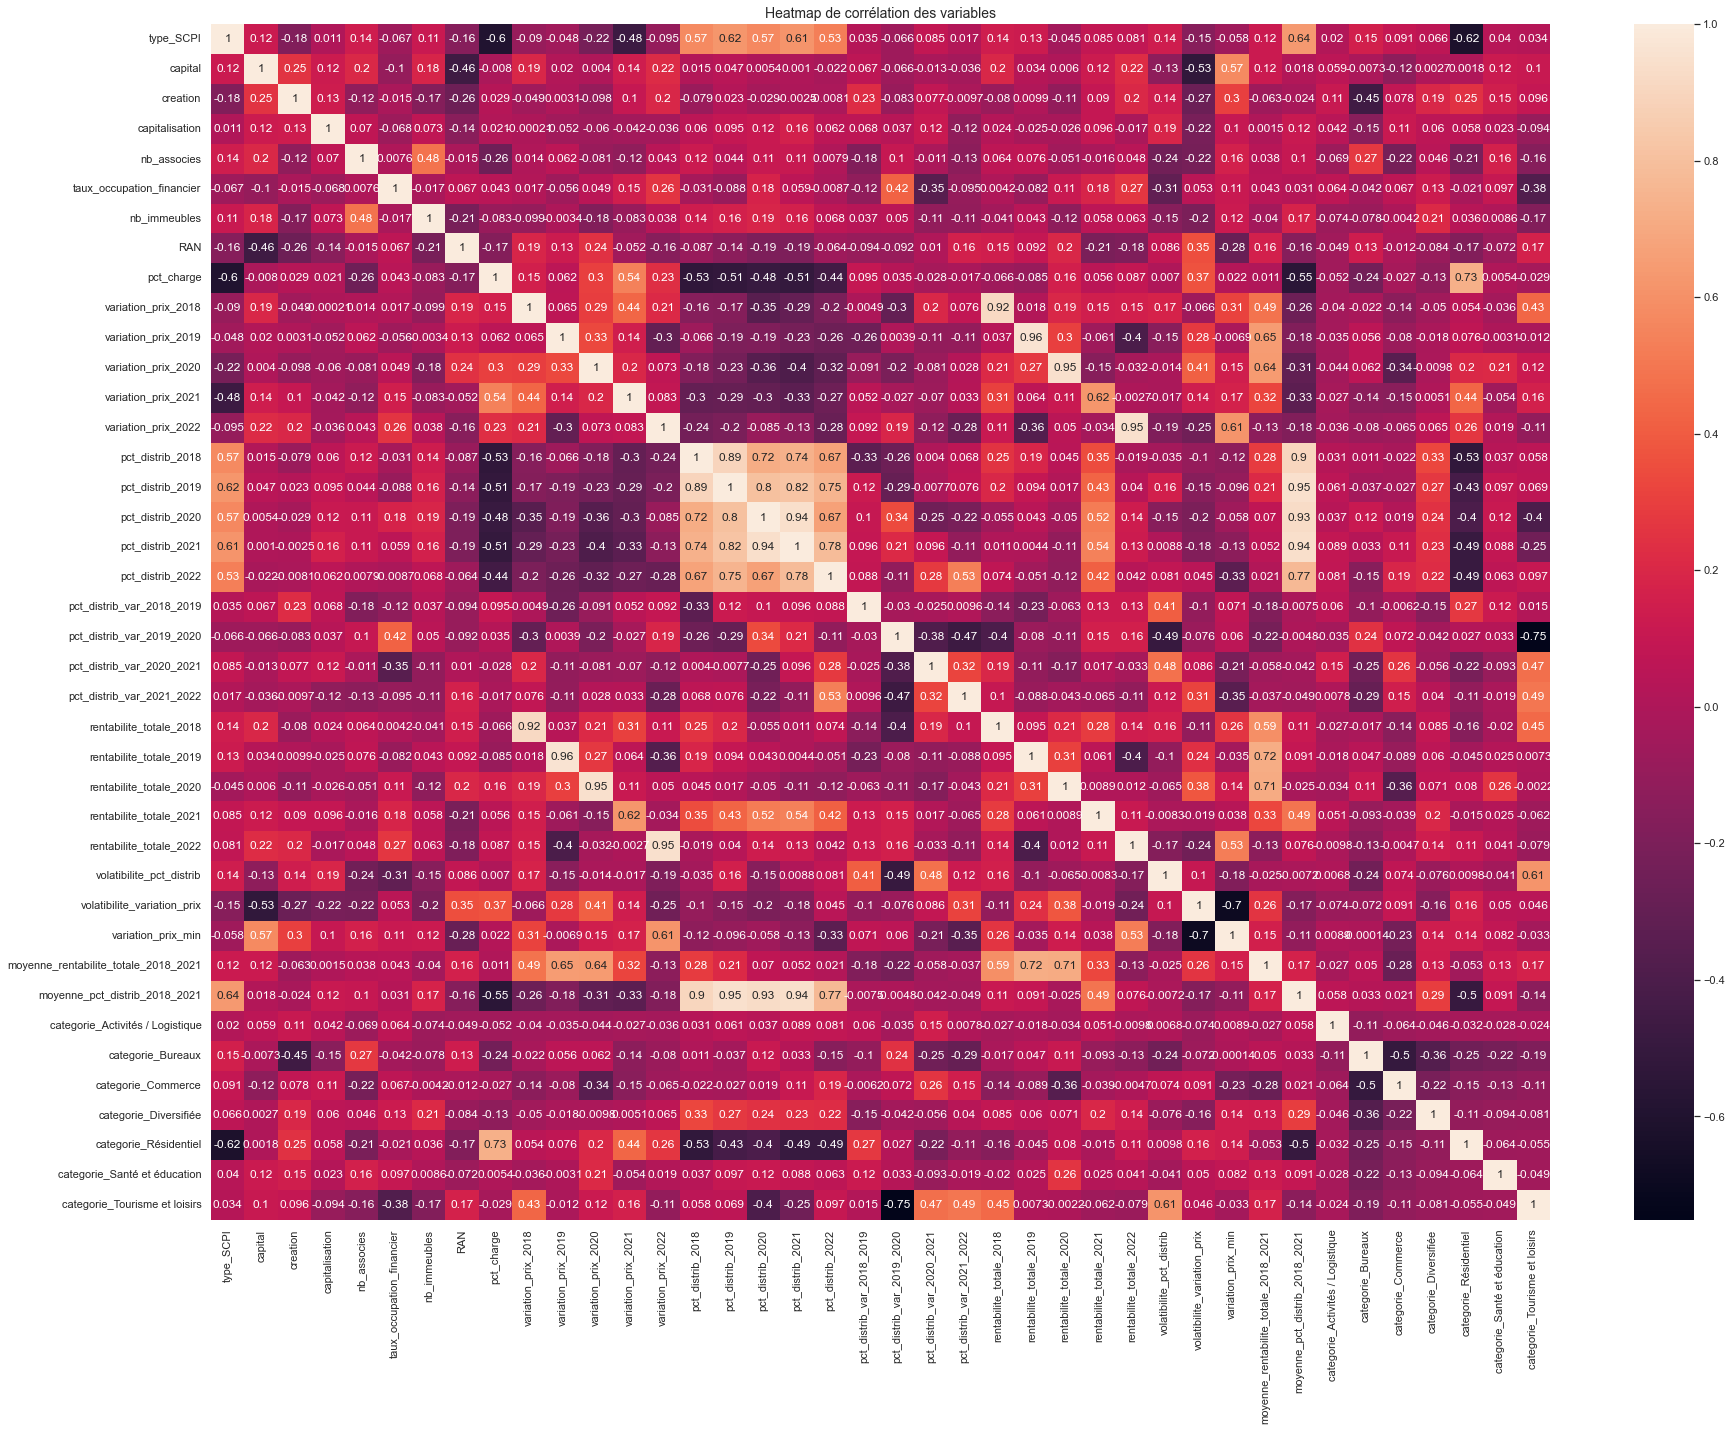

In [57]:
# Fonction affichant la heatmap
plt.subplots(figsize = (30, 22))
sns.heatmap(df.corr(), annot=True)
plt.title("Heatmap de corrélation des variables", fontsize = 14);  

On peut en déduire que les variables de pourcentages de distribution sont évidemment très corrélés entre eux, car le rendement des SCPI est essentiellement assurés par des loyers qui varient peu dans le temps.
On voit également que le pourcentage de distribution est corrélé à :
- scpi de rendement
- un pourcentage de charge peu important
- une catégorie comme l'on a vu plus haut qui peut jouer en faveur ou en défaveur

In [58]:
df.to_excel('df_dummies_total.xlsx')

In [59]:
#on drop ces éléments car trop volatils :
df=df.drop(index=6,axis=0)
df=df.drop(index=96,axis=0)
print("Après drop :")
print("mean_squared_error entre la rentabilité de 2022 et la moyenne des années précédentes :", mean_squared_error(df['moyenne_rentabilite_totale_2018_2021'],df['pct_distrib_2022']))
print("mean_squared_error entre la pct de distribution de 2022 et la moyenne des années précédentes :", mean_squared_error(df['moyenne_pct_distrib_2018_2021'],df['pct_distrib_2022']))
df=df.drop(['creation','capitalisation','taux_occupation_financier','nb_associes','RAN','rentabilite_totale_2018','rentabilite_totale_2019','rentabilite_totale_2020','rentabilite_totale_2021','rentabilite_totale_2022','pct_distrib_var_2018_2019','pct_distrib_var_2019_2020','pct_distrib_var_2020_2021','pct_distrib_var_2021_2022','volatibilite_pct_distrib','volatibilite_variation_prix','moyenne_rentabilite_totale_2018_2021','moyenne_pct_distrib_2018_2021'],axis=1)

Après drop :
mean_squared_error entre la rentabilité de 2022 et la moyenne des années précédentes : 4.465906944444445
mean_squared_error entre la pct de distribution de 2022 et la moyenne des années précédentes : 0.33722187499999995


La somme des carrées des erreurs entre la moyenne des années précédentes et l'année 2022 étant de 0.34, on va essayer de mieux faire avec le machine learning.

In [60]:
#Sauvegarde :
df.to_excel('df.xlsx')